# StyleGAN2-ADA: training a model from scratch


##Introduction


---



**References:**
- Woctezuma's notebook and work: https://github.com/woctezuma/steam-stylegan2-ada
- The original StyleGAN2-ADA repository: https://github.com/NVlabs/stylegan2-ada
- My blog post + diary: https://github.com/deanodeano11/my-work-on-StyleGAN2-ada/tree/main/Local%20Hand%20in%20data

###**What is Colab**
Basically colab is a free service by google which allows you to run your code on a linux virtual machine

This helps in two ways as:


*   You dont need to have an Nvidia graphics card (or any card)
*   Your computer will not be slowed from resource usage when training

For more info on the usage and pros/cons of colab please refer to my blog post page, found in the github repo



###**What will you learn from this guide**

This guide will take you through the basics of how to find your dataset and then using the dataset to train the network. From this trained network we can then produce new images which theoretically look like those in the dataset provided, in my case i aimed to produce a new image of a dog.

All of the execution of code will be done on google colab which essentially gives us a free virtual environment to train the network on (so no need to worry about computing power). for more information on google colab please check out my blog post.

###**What is StyleGan**
StyleGan itself is a generative adversarial network (GAN) which was brought forward from Nvidia researchers in December 2018, for more information on StyleGAN2-ada please check out my blog post. 

###**What can be produced**
So far i have been able to produce my own 'dog' image:

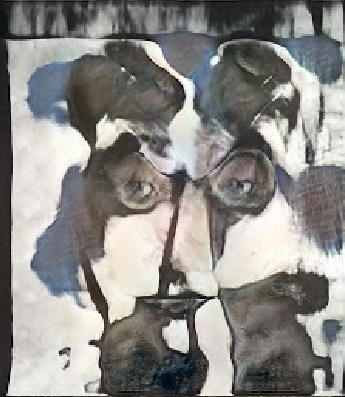

This image obviously isn't very dog like however with further training (and maybe a better dataset choice) the network could produce very realistic dog images.


For example researchers over at nvidia have produced a very high quality GAN to produce dog images with extreme realism: 
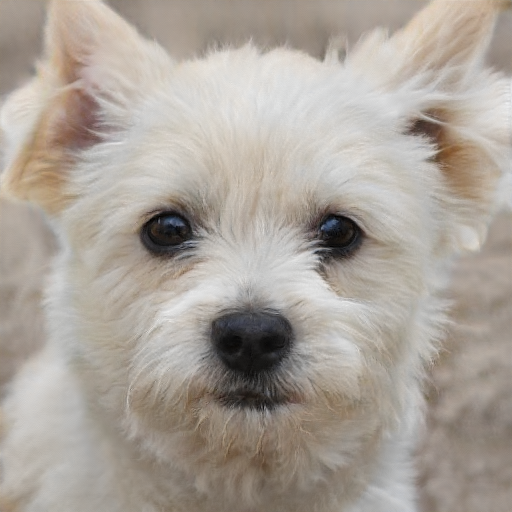

More information on this network can be found in my blog post. I will also show how you can use these pretrained networks in the usage section of this notebook.

###**How could you go about doing this**
There are 5 main steps:
1.   Finding your dataset
2.   Preparing your dataset
3.   Converting your dataset to .tfrecords
4.   Training your network
5.   Using your trained network




###**Finding your dataset**
####What makes a good dataset


*   How good a dataset is entirely depends on the situation and what you are    trying to achieve.
*   In our case we are working with images and generally speaking the more images you have the better results you will have.
*   However larger datasets come with the tradeoff that they take significantly more time and effort to work with


###**Where can i find these datasets**
These are just some of the good resources i have found for getting a good dataset:

*   [Kaggle](https://www.kaggle.com/datasets) - a collection of over 70,000 datasets with a search function
*   [Google](https://datasetsearch.research.google.com/) - Googles dataset search feature
*   [Cats and Dogs](https://www.microsoft.com/en-us/download/details.aspx?id=54765) - This is the specific dataset i will be working with (more specifically 3000 of the dog images)

If you still cant find what youre looking for you can also check [this page](https://careerfoundry.com/en/blog/data-analytics/where-to-find-free-datasets/) out 




Couple of Notes before you settle on a dataset:


*   In order to work with StyleGan2-ada the resolution has to be a power of two, with identical height and width for example: 64x64,128x128,256x256. Either you can find a dataset in this format or we can simply convert it, which i shall be showing you how to do.

*   For the sake of simplicity i would recommend finding datasets with image sizes less or equal to 1024x1024

*   For the purposes of this guide i would recommend that you keep your dataset below 2gb in size (Due to colab having an 8 hour usage limit)

*   As of right now this tutorial can only show you how to train a GAN on images of similar things, eg dogs. So one folder with all of your images should be used




###**After Downloading dataset**


1.   Ensure that your dataset is simply one folder with lots of images
2.   Send this folder to a compressed zip file
3.   Upload this file to your google drive so that it can be accessed through colab



If you want to use it, the flowers dataset is available on the github repo


Now you may continue below to the section on using the notebook

##Using the notebook
**Each Code Cell will be annotated with a text cell above it**


---





###Initialisation (Run these cells any time you want to use notebook)


The Cells below: 
- Import google drive 
- Select the correct version of tensorflow
- Install Stylegan

Therefore they are necessary every time you start the virtual machine

#### Mount Google Drive

Imports the Google Colab transfer module which we will use in the next few cells

In [ ]:
%pip install Google-Colab-Transfer

Makes use of the Google Colab transfer module to:
- set the home path of your google drive
- set the home path of the virtual machine.
- mount your google drive to the virtual machine (follow instructions)

In [ ]:
import colab_transfer

gd = colab_transfer.get_path_to_home_of_google_drive()
lm = colab_transfer.get_path_to_home_of_local_machine()

colab_transfer.mount_google_drive()

Mounted at /content/drive/


#### Switch to Tensorflow 1.x

> TensorFlow 2.x is not supported.

Reference: https://github.com/NVlabs/stylegan2-ada#requirements

> Colab uses TensorFlow 2.x by default, though you can switch to 1.x by the method shown below.

Reference: https://colab.research.google.com/notebooks/tensorflow_version.ipynb

So simply run the code below to use 1.x

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


#### Install my fork of StyleGAN2-ADA
Installing my StyleGan2-ada fork to the local machine

A syntax error kept occuring and so during this step i also replace train.py with my own version.

Therefore the instructions here are:
- clone my fork of stylegan2-ada
- clone my fixed train.py file
- replace the broken train.py file in stylegan2-ada with my fixed version

For reference:

%cd is for setting the current directory

%rm is for removing references

%cp -av is for copying one folder to another destination folder

!git is for using git commands

!mv is for moving a file

!rm is for removing a file



In [ ]:
%cd /home/
#Remove clone of github page if it exists
%rm -rf my-work-on-StyleGAN2-ada/
#Clone in my github page (this page contains documentation and therefore i must copy over only the useful folder to /content/)
!git clone https://github.com/deanodeano11/my-work-on-StyleGAN2-ada
#Set the current directory to be /content/
%cd /content/
#Remove any existing copies of the folder im about to copy
%rm -rf stylegan2-ada/
#Copy the stylegan source code from my original github clone, into the content folder for usage
%cp -av /home/my-work-on-StyleGAN2-ada/stylegan2-ada /content/stylegan2-ada
#The next pieces of code replace the faulty train.py code
%cd stylegan2-ada/
#Remove original, broken file
%rm /content/stylegan2-ada/train.py
#Replace with new fixed file
!mv "/home/my-work-on-StyleGAN2-ada/New Train.py/train.py" "/content/stylegan2-ada"
#(Editing the original file weirdly does not fix this error)
%cd /content/

/home
Cloning into 'my-work-on-StyleGAN2-ada'...
remote: Enumerating objects: 364, done.
remote: Counting objects: 100% (364/364), done.
remote: Compressing objects: 100% (333/333), done.
remote: Total 364 (delta 37), reused 352 (delta 27), pack-reused 0
Receiving objects: 100% (364/364), 64.40 MiB | 32.31 MiB/s, done.
Resolving deltas: 100% (37/37), done.
/content
'/home/my-work-on-StyleGAN2-ada/stylegan2-ada' -> '/content/stylegan2-ada'
'/home/my-work-on-StyleGAN2-ada/stylegan2-ada/.gitignore' -> '/content/stylegan2-ada/.gitignore'
'/home/my-work-on-StyleGAN2-ada/stylegan2-ada/Dockerfile' -> '/content/stylegan2-ada/Dockerfile'
'/home/my-work-on-StyleGAN2-ada/stylegan2-ada/LICENSE.txt' -> '/content/stylegan2-ada/LICENSE.txt'
'/home/my-work-on-StyleGAN2-ada/stylegan2-ada/README.md' -> '/content/stylegan2-ada/README.md'
'/home/my-work-on-StyleGAN2-ada/stylegan2-ada/calc_metrics.py' -> '/content/stylegan2-ada/calc_metrics.py'
'/home/my-work-on-StyleGAN2-ada/stylegan2-ada/dataset_tool.py'

###Preparing your dataset

####Loading dataset zip file to colab

Before using this you must upload the zip file of your dataset to your google drive

The code below will then unzip your dataset

Then you must:

- Enter the full path of your file after the '!unzip '
- Enter after '-d ' what you would like your dataset directory to be named (you can just keep it as dataset)

In [ ]:
!unzip '/content/drive/MyDrive/Dataset/PassionFlower.zip' -d flowerdataset

Archive:  /content/drive/MyDrive/Dataset/PassionFlower.zip
  inflating: flowerdataset/PassionFlower/image_01584.jpg  
  inflating: flowerdataset/PassionFlower/image_01585.jpg  
  inflating: flowerdataset/PassionFlower/image_01586.jpg  
  inflating: flowerdataset/PassionFlower/image_01587.jpg  
  inflating: flowerdataset/PassionFlower/image_01588.jpg  
  inflating: flowerdataset/PassionFlower/image_01589.jpg  
  inflating: flowerdataset/PassionFlower/image_01590.jpg  
  inflating: flowerdataset/PassionFlower/image_01591.jpg  
  inflating: flowerdataset/PassionFlower/image_01593.jpg  
  inflating: flowerdataset/PassionFlower/image_01595.jpg  
  inflating: flowerdataset/PassionFlower/image_01597.jpg  
  inflating: flowerdataset/PassionFlower/image_01600.jpg  
  inflating: flowerdataset/PassionFlower/image_01601.jpg  
  inflating: flowerdataset/PassionFlower/image_01602.jpg  
  inflating: flowerdataset/PassionFlower/image_01604.jpg  
  inflating: flowerdataset/PassionFlower/image_01605.jpg

####Making your images the correct resolution (IF NOT ALREADY IN CORRECT RESOLUTION)

*   Your dataset has to be a power of two, with identical height and width for example: 64x64,128x128,256x256 etc.
*   If your images are already in that format then you can skip this section of the guide
*   However in my cats and dogs example all of the images are not square
*   We must identify what power of 2 the images resoltions are all lower than, in my case all of the images are less than 512x512 in size so this will be my target resolution 
*   We will be using python along with the PIL module to resize and pad them. 
*   The code that i will provide on colab will use PIL to convert your images like so:
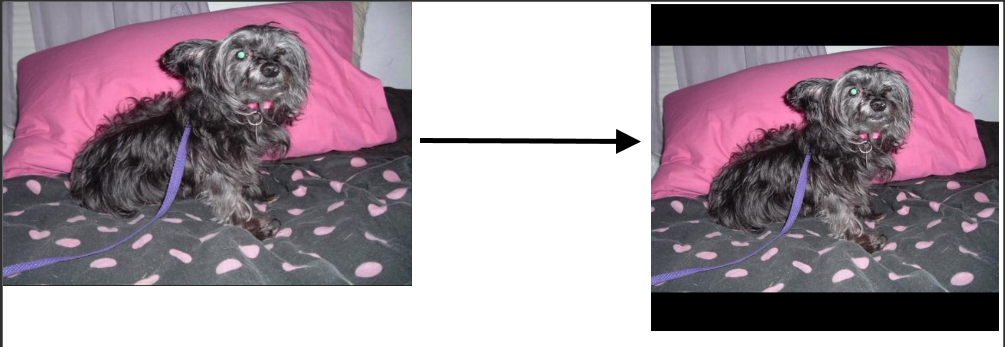



This code will simply run through a directory of jpgs (i.e the dataset you just unzipped) and add padding to the image in order to increase its resolution to a resolution that StyleGAN can work with

To use:
- Set the path variable to the path of your dataset folder (Can be copied in the file explorer tab on the left of colab)
- Ensure there are only images within this folder, if they are jpg that is perfect, if they are png then change which new_im.save line of code you are using
- Edit desired_size variable to be the size you want, in resolution: desired_sizeXdesired_size
- Then simply run the program
- If any errors are encountered, eg finding a non image file, simply remove the file (using the code in the next cell) then continue

In [ ]:
from PIL import Image
import time
import os, sys

path = "/content/flowerdataset/PassionFlower/" #Input the path here of your folder of images, if there are any other files in the folder the program could stop working
dirs = os.listdir( path )
count = 0
desired_size = 1024 #Please edit this to be your desired resolution
def resize():
    for item in dirs:
        filename=path+item
        if os.path.isfile(path+item):
            #Check if it is already resized before doing anything
            if (item[len(item)-5]!='r'):
                im = Image.open(filename)
                #Get size of image
                old_size = im.size

                ratio = float(desired_size)/max(old_size)
                new_size = tuple([int(x*ratio) for x in old_size])
                #this part ensures the image is rgb as an error would be thrown if it isnt
                if im.mode != 'RGB':
                    im = im.convert('RGB')
                f, e = os.path.splitext(filename)
                #Resizing 
                im = im.resize(new_size, Image.ANTIALIAS)
                #Making a blank white image
                new_im = Image.new("RGB", (desired_size, desired_size))
                #Putting the original image on the desired size white image
                new_im.paste(im, ((desired_size-new_size[0])//2,
              
                    (desired_size-new_size[1])//2))
                #Save resized file
               #new_im.save(f +'r.png', 'png', quality=90)
                new_im.save(f +'r.jpg', 'jpeg', quality=90)
                #             ^^^^this bit is the file name, im just doing the original name with r after it for resized
                #Delete original once done
                remove_file(filename)
                print (filename+" padded")
    print ("Completed Padding") 
#This function reattempts the delete until the file is available for deleting, stops a random error
def remove_file(path, retries=3, sleep=0.1):
    for i in range(retries):
        try:
            os.remove(path)
        except WindowsError:
            time.sleep(sleep)
        else:
            break

resize()


/content/flowerdataset/PassionFlower/image_07836.jpg padded
/content/flowerdataset/PassionFlower/image_07604.jpg padded
/content/flowerdataset/PassionFlower/image_04802.jpg padded
/content/flowerdataset/PassionFlower/image_04789.jpg padded
/content/flowerdataset/PassionFlower/image_07768.jpg padded
/content/flowerdataset/PassionFlower/image_07630.jpg padded
/content/flowerdataset/PassionFlower/image_01822.jpg padded
/content/flowerdataset/PassionFlower/image_07731.jpg padded
/content/flowerdataset/PassionFlower/image_01795.jpg padded
/content/flowerdataset/PassionFlower/image_02866.jpg padded
/content/flowerdataset/PassionFlower/image_01745.jpg padded
/content/flowerdataset/PassionFlower/image_05223.jpg padded
/content/flowerdataset/PassionFlower/image_04793.jpg padded
/content/flowerdataset/PassionFlower/image_07474.jpg padded
/content/flowerdataset/PassionFlower/image_01682.jpg padded
/content/flowerdataset/PassionFlower/image_06658.jpg padded
/content/flowerdataset/PassionFlower/ima

If any image files end up being corrupted or a non image file is found and an error is thrown

Simply use !rm and then the path name of the file to remove it

In [ ]:
!rm /content/dataset/PetImages/Cat/666.jpg

rm: cannot remove '/content/dataset/PetImages/Cat/666.jpg': No such file or directory


### Converting your dataset to .tfrecords

Reference: https://github.com/NVlabs/stylegan2-ada#preparing-datasets

Tensorflow records or tfrecords are simply the file type which StyleGAN2-ada reads in datasets as, so we have to convert our directory of images to be of this type

In the cells below we are simply setting variables to be the paths of your dataset + the output, please change:

- custom_dataset to be the file path on the local machine that your tfrecords will be stored to 

- custom_images to be the file path of the folder containing your dataset

In [ ]:
custom_dataset = '/content/tfrecords/passionflower/'
custom_images = '/content/flowerdataset/PassionFlower'

This code simply creates the tensorflow records from the images folder, no extra tinkering needed just run the cell

In [ ]:
 !python stylegan2-ada/dataset_tool.py create_from_images {custom_dataset} {custom_images}

Loading images from "/content/flowerdataset/PassionFlower"
Creating dataset "/content/tfrecords/passionflower/"
stylegan2-ada/dataset_tool.py:96: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
Added 1016 images.


#### Archive prepared datasets to Google Drive

Once you have done this it is a good idea to run this command do save the created tfrecords to your google drive so that they are not lost once you disconnect from the virtual machine

In [ ]:
colab_transfer.copy_folder('tfrecords/passionflower',
                            source=lm,
                            destination=gd)

Copying /content/tfrecords/passionflower to /content/drive/My Drive/tfrecords/passionflower


### Import previously prepared datasets from Google Drive

This cell is for copying tfrecords which you have previously saved to your drive, back onto the local machine, simply enter the folder path on your drive

In [ ]:
colab_transfer.copy_folder('tfrecords/flower')

Copying /content/drive/My Drive/tfrecords/flower to /content/tfrecords/flower


### Training your network

Having produced the dataset in tfrecords form which StyleGAN2-ada can read, this is where we actually train the network.

Note that anything starting with '--' is a training setting

Generally the settings that i have already set should work but read through the next sections to understand them

References:
-   https://github.com/NVlabs/stylegan2-ada#training-new-networks
-   https://raw.githubusercontent.com/NVlabs/stylegan2-ada/main/docs/train-help.txt

#### Settings Explanations




- Outdir is the output directory which the trained pkl and other files will be saved to (You should save to your google drive so you don't lose the files)
- A tick requires 4 minutes of computation time, so we save a snapshot every 6 ticks (`--snap=6`) in order to save every 24 minutes.
- Data is the folder containing your .tfrecords files (and should be set)
- Mirror is whether or not your images can be mirrored and this mirrored image also used as an image to train on
- Metrics is for saving advanced data about the training process (i just kept it off for simplicity
- `--cfg=auto` serves as a reasonable first guess for the hyperparameters, it does't necessarily lead to optimal results for a given dataset. But for our case we can simply keep it as auto
- KImg is how many 1000s of images you want the training process to run through, we just set it at a very overly high 5000 and then the code will continue to process images until google colab times out
- Resume is what network this training is continuing from (in the form of a network pkl), this can either be continued from a previous snapshot or from a pretrained network (more on this later)
- Freeze is about freezing the discriminator (Read blog post to learn more about what this is)

For your initial run just change the directories as necessary and leave the rest as they are


#### Train

NB: to ensure your Colab session stays connected:

- Start running the cell you want to run
- Left click on the cell which says 'while True:pass', Note that i mean the cell itself, not the run button
- At the top click runtime, then select run after
- This means that once the run has completed this cell will automatically run and stop colab from disconnecting
- Note that the 8 hour limitation still exists

##### Transfer Learning Run

Transfer learning is where we use a pretrained network and train it upon our dataset. It has many advantages but the main one is that it saves on training time (For more info check out my blog post)

```
transfer learning:
  --resume RESUME       Resume from network pickle (default: noresume)
  --freezed INT         Freeze-D (default: 0 discriminator layers)
```
```
transfer learning source networks (--resume):
  ffhq256        FFHQ trained at 256x256 resolution. (256x256 faces)
  ffhq512        FFHQ trained at 512x512 resolution. (512x512 faces)
  ffhq1024       FFHQ trained at 1024x1024 resolution. (1024x1024 faces)
  celebahq256    CelebA-HQ trained at 256x256 resolution. (256x256 celeb faces)
  lsundog256     LSUN Dog trained at 256x256 resolution. (256x256 diverse dataset - recommended)
  <path or URL>  Custom network pickle.

```
Note that you will have to use a source which is of the same resolution.

More of these source networks can be found [here](https://github.com/NVlabs/stylegan2-ada#external-data-repository)



- Set your outdir variable to where you would like your trained network to be saved, it is strongly recommended to save it to your google drive to ensure it is not lost due to disconnecting from the local machine

- set the data variable to your tfrecords file

- Choose your --resume network pkl based on the information above 


In [ ]:
 !python stylegan2-ada/train.py \
  --outdir='/content/drive/My Drive/flowertraining-runs' \
  --snap=6 \
  --data='/content/tfrecords/passionflower' \
  --mirror=true \
  --metrics=none \
  --cfg=auto \
  --kimg=5000 \
  --resume=ffhq1024 \
  --freezed=10 \
  --TF_CPP_MIN_LOG_LEVEL=2 \ 
 

usage: train.py [-h] --outdir DIR [--gpus INT] [--snap INT] [--seed INT] [-n]
                --data PATH [--res INT] [--mirror BOOL] [--metrics LIST]
                [--metricdata PATH]
                [--cfg {auto,stylegan2,paper256,paper512,paper1024,cifar,cifarbaseline}]
                [--gamma FLOAT] [--kimg INT] [--aug {noaug,ada,fixed,adarv}]
                [--p FLOAT] [--target TARGET]
                [--augpipe {blit,geom,color,filter,noise,cutout,bg,bgc,bgcf,bgcfn,bgcfnc}]
                [--cmethod {nocmethod,bcr,zcr,pagan,wgangp,auxrot,spectralnorm,shallowmap,adropout}]
                [--dcap FLOAT] [--resume RESUME] [--freezed INT]
train.py: error: unrecognized arguments: --TF_CPP_MIN_LOG_LEVEL=2  


In [ ]:
while True:pass

KeyboardInterrupt: ignored

##### Following runs (resume from latest snapshot)

If you are still connected to the machine you will **automatically** resume from the latest pickle snapshot.

If not (most cases) you will have to manually specfiy the transfer learning folder path after --resume.

This will be the most recent .pkl file produced (can reference the pkl in your google drive)

You will have to **manually** specify the augmentation strength, this is found within the log.txt file in the folder containing your trained.pkl file.

Set the --p parameter to be the augment of the final tick in your log.txt file

Note that you can continue to rerun the training on the pkl produced from this run, then you may repeat this as much as you want to train for as long as you want

In [ ]:
!python stylegan2-ada/train.py \
 --outdir='/content/drive/My Drive/training-runs' \
 --snap=6 \
 --data='/content/tfrecords/passionflower' \
 --mirror=true \
 --metrics=none \
 --cfg=auto \
 --kimg=5000 \
 --resume='/content/drive/MyDrive/flowertraining-runs/00006-passionflower-mirror-auto1-kimg5000-resumeffhq1024-freezed10/network-snapshot-000096.pkl' \
 --aug=fixed \
 --p=0.432 \
 --freezed=10 \
 

tcmalloc: large alloc 4294967296 bytes == 0x55c62ff08000 @  0x7f52d96a5001 0x7f52d68e854f 0x7f52d6938b58 0x7f52d693cb17 0x7f52d69db203 0x55c628b120e4 0x55c628b11de0 0x55c628b866f5 0x55c628b80e0d 0x55c628b1402c 0x55c628b54d39 0x55c628b51c84 0x55c628b128e9 0x55c628b86ade 0x55c628b80b0e 0x55c628a52e2b 0x55c628b831e6 0x55c628b80b0e 0x55c628a52e2b 0x55c628b831e6 0x55c628b80e0d 0x55c628a52e2b 0x55c628b831e6 0x55c628b1369a 0x55c628b81a45 0x55c628b80b0e 0x55c628b80813 0x55c628c4a592 0x55c628c4a90d 0x55c628c4a7b6 0x55c628c22103
tcmalloc: large alloc 4294967296 bytes == 0x55c72ff08000 @  0x7f52d96a31e7 0x7f52d68e846e 0x7f52d6938c7b 0x7f52d693935f 0x7f52d69db103 0x55c628b120e4 0x55c628b11de0 0x55c628b866f5 0x55c628b80b0e 0x55c628b1377a 0x55c628b8286a 0x55c628b80b0e 0x55c628b1377a 0x55c628b8286a 0x55c628b80b0e 0x55c628b1377a 0x55c628b8286a 0x55c628b1369a 0x55c628b81a45 0x55c628b80b0e 0x55c628b1377a 0x55c628b85e50 0x55c628b80b0e 0x55c628b1377a 0x55c628b8286a 0x55c628b80e0d 0x55c628b1402c 0x55c628b5

In [ ]:
while True:pass

KeyboardInterrupt: ignored

### Using the trained Network (and other pretrained networks)
This final section of the notebook showcases then how these produced pkl files can be used

Generation Settings


*   '--outdir' Is the output directory of the generation, you should point it to a new or empty folder within your google drive
*   '--network' Is the network pkl you would like to use, you can either point to your own generated .pkl file or a pretrained pkl in the form: https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/(NAME HERE).pkl  - Click the link to see available options



#####Image Generation (From seeds)
This method creates multiple images based on the provided lists of seeds, which can be any number. It produces one image per seed

An example of how you could use this method to generate an image using a pretrained network:

In [ ]:
!python stylegan2-ada/generate.py \
  --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/afhqdog.pkl \
  --seed=100 \
  --outdir='/content/dog'\

An example of how you could use this method to generate an image using your own network:

In [ ]:
!python stylegan2-ada/generate.py \
  --network='/content/drive/MyDrive/training-runs/00003-dog-mirror-auto1-kimg5000-fixed-p0.516-resumecustom-freezed10/network-snapshot-000096.pkl' \
  --seed=1000 \
  --outdir='/content/dog'\

#####Image Generation (from json)
This is a custom method that i made myself, initially you should run it without the zvariables and noisevars parameters and it will then produce jsons of these variables which can be read back into this method, to generate images identical to the original

More into the potential usages of this is in my blog post

Firstly you would run the code without the zvariables or noisevars as input:

In [ ]:
!python stylegan2-ada/generateEdited.py \
 --outdir='/content/drive/My Drive/ImageCreation/ImageGen/Testing2' \
 --network='/content/drive/MyDrive/training-runs/00003-dog-mirror-auto1-kimg5000-fixed-p0.516-resumecustom-freezed10/network-snapshot-000096.pkl' \

Then you could run it using the paths of the json files that the cell above created in its outdir, this would give you an identical image.

In [ ]:
!python stylegan2-ada/generateEdited.py \
 --outdir='/content/drive/My Drive/ImageCreation/ImageGen/Testing2' \
 --network='/content/drive/MyDrive/training-runs/00003-dog-mirror-auto1-kimg5000-fixed-p0.516-resumecustom-freezed10/network-snapshot-000096.pkl' \
 --zvariables='/content/drive/MyDrive/ImageCreation/ImageGen/Testing/z.json'\
 --noisevars='/content/drive/MyDrive/ImageCreation/ImageGen/Testing/myNoiseVarsDict.json'\

Loading networks from "/content/drive/MyDrive/training-runs/00003-dog-mirror-auto1-kimg5000-fixed-p0.516-resumecustom-freezed10/network-snapshot-000096.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
OBJ VAR
[[1.4493279870601095, 0.2192608956812752, -1.5369494019459726, 2.6748804724311697, -0.3317667321349594, -0.15638458413126863, 1.4330122324486003, 0.24830598636223133, -0.3365279886165233, 0.8119603861259465, -0.1758221827329681, 1.301542418599751, 0.3043666120969125, -0.9228514061266039, -1.1701413450227993, 0.29830379206286783, 0.34592299022243467, 1.2637683865434945, -0.36507416249229163, 1.5502339680963297, 1.2079466960834604, 0.23919977286553776, -0.1875008396655946, 1.1978685756013496, 1.2121096743179818, -0.20246141082632044, 0.6775164023667386, -0.09603235618846069, -0.0023448196098602614, -1.2054063002139048, 0.9128997747701633, 0.9880075463486218, 1.3292973339435854, -0.19610333721533

#####Image Grid
This method creates a grid of images based on the rows and columns provided, it can also be used with a pretrained network if you want

In [ ]:
!python stylegan2-ada/style_mixing.py \
 --outdir='/content/drive/My Drive/ImageCreation/ImageGrid/WithTrunc' \
 --network='/content/drive/MyDrive/training-runs/00003-dog-mirror-auto1-kimg5000-fixed-p0.516-resumecustom-freezed10/network-snapshot-000096.pkl' \
 --trunc=0.5 \
 --rows=1,41,208,322,424,939 \
 --cols=1,41,208,322,424,939 \

Traceback (most recent call last):
  File "stylegan2-ada/style_mixing.py", line 20, in <module>
    import dnnlib.tflib as tflib
  File "/content/stylegan2-ada/dnnlib/tflib/__init__.py", line 9, in <module>
    from . import autosummary
  File "/content/stylegan2-ada/dnnlib/tflib/autosummary.py", line 28, in <module>
    import tensorflow as tf
  File "/tensorflow-1.15.2/python3.7/tensorflow/__init__.py", line 99, in <module>
    from tensorflow_core import *
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/__init__.py", line 28, in <module>
    from tensorflow.python import pywrap_tensorflow  # pylint: disable=unused-import
  File "<frozen importlib._bootstrap>", line 1019, in _handle_fromlist
  File "/tensorflow-1.15.2/python3.7/tensorflow/__init__.py", line 50, in __getattr__
    module = self._load()
  File "/tensorflow-1.15.2/python3.7/tensorflow/__init__.py", line 44, in _load
    module = _importlib.import_module(self.__name__)
  File "/usr/lib/python3.7/importlib/__init__.p

#####Projecting
In this method the network produces a random image, then checks how different this is to the given target image, then adjusts the vector of the image for a certain amount of iterations reducing the difference between the images each time. It then produces a video showing this process.

You can use whatever network and target image you want. The target image must be uploaded and then its file path set.

The target image must also be of the same resolution that the provided network was trained on

This method can also be used on either your own produced pkl, or one of the pretrained networks, currently it is set to a network pretrained on dogs


In [ ]:
   !python stylegan2-ada/projector.py \
    --target='/content/4r.jpg' \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/afhqdog.pkl \
    --seed=1 \
    --outdir='/content/drive/My Drive/ImageCreation/ImageVector3/'\

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/afhqdog.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Compiling... Loading... Done.
Projector: Computing W midpoint and stddev using 10000 samples...
Projector: std = 9.00199
Projector: Setting up noise inputs...
Projector: Building image output graph...
Projector: Building loss graph...
Projector: Building noise regularization graph...
Projector: Setting up optimizer...
Projector: Preparing target images...
Projector: Initializing optimization state...
100% 1000/1000 [03:08<00:00,  5.30it/s, dist=0.3429, loss=0.34]
